In [124]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [125]:
## load the data
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [127]:
df = df.drop(columns=['Email No.'])

In [128]:
## split the data into independent and dependent variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [129]:
## split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [130]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)


/Users/james/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [132]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)


0.9623188405797102
[[698  18]
 [ 21 298]]


In [133]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)


GaussianNB()

In [134]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [135]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.9458937198067633
[[676  40]
 [ 16 303]]


In [136]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       716
           1       0.88      0.95      0.92       319

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



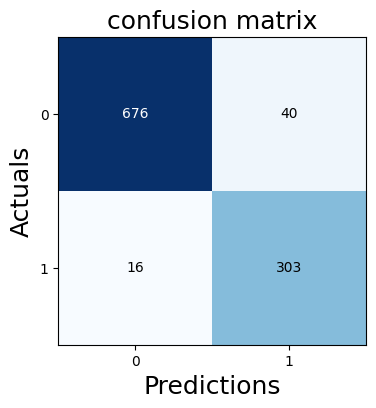

In [137]:
## confusion matrix plot
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_NB, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()


AUC: 0.946989


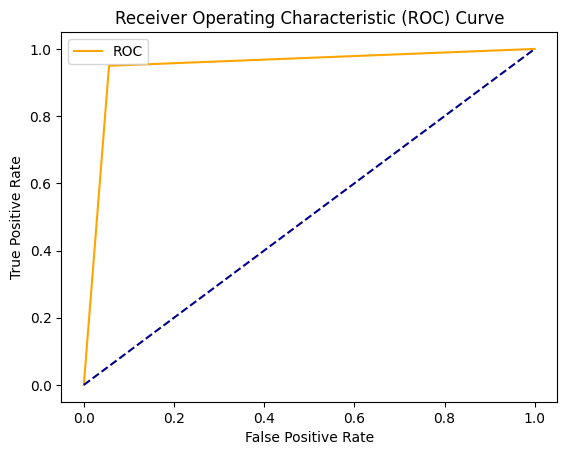

In [138]:

auc_mod2 = roc_auc_score(y_test, y_pred_NB)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_NB)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [139]:
## 0 and 1
#0.5 ----randomely guessing
#less than 0.5 poor model and you need to go back and try several other models
#1--- indicating that your model is able to predict positive and negative classess perfectly

In [140]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [141]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential


In [142]:
## initialise your neural network
model = Sequential()

## set up your input layer
model.add(Dense(units = 16, kernel_initializer = "uniform", activation = 'relu', input_dim = 3000))

# hidden layer one
model.add(Dense(units = 8, kernel_initializer = "uniform", activation = 'relu'))

# hidden layer two
model.add(Dense(units = 4, kernel_initializer = "uniform", activation = 'relu'))

# regularization
model.add(Dropout(0.25))

#output layer
model.add(Dense(units = 1, kernel_initializer = "uniform", activation = 'sigmoid'))

#compiling the network
## optimizer - adam, sgd - stochastic gradient descent, rmsprop -- root mean square propagation
## binary classification -- binary_cross_entropy, multi class classification -- categorical_cross_entropy
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [143]:
## train your network
## you are training in batches because the training is hugh
# ...larger batch size will lead to more memory
# ...small batch size memory efficient but can increase noises
# epochs mean how many times you want to train your network...e.g. if you keep learning something then you can remember things better
# the number of times can lead of overfit
# 20% of my data will be use for validation
history = model.fit(X_train, y_train, batch_size=120, epochs=20, validation_split=0.20)

Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.6874 - accuracy: 0.7132 - val_loss: 0.6748 - val_accuracy: 0.7186
Epoch 2/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.7135 - val_loss: 0.6506 - val_accuracy: 0.7186
Epoch 3/20
28/28 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.7135 - val_loss: 0.5800 - val_accuracy: 0.7186
Epoch 4/20
28/28 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7135 - val_loss: 0.4073 - val_accuracy: 0.7186
Epoch 5/20
28/28 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.7135 - val_loss: 0.3080 - val_accuracy: 0.7186
Epoch 6/20
28/28 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.7135 - val_loss: 0.2712 - val_accuracy: 0.7186
Epoch 7/20
28/28 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.7407 - val_loss: 0.2430 - val_accuracy: 0.8273
Epoch 8/20
28/28 [==

In [144]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                48016     
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dropout_6 (Dropout)         (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 48193 (188.25 KB)
Trainable params: 48193 (188.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [145]:
## save the network
model.save('clf')

INFO:tensorflow:Assets written to: clf/assets


INFO:tensorflow:Assets written to: clf/assets


In [146]:
## save as one file
model.save('clf.h5')

/Users/james/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [147]:
## load the file
## you can write a code to trigger this file to make predictions
clf_model = tf.keras.models.load_model('clf.h5')

In [148]:
## make prediction
y_pred_ann = clf_model.predict(X_test)

33/33 [==============================] - 0s 935us/step


In [149]:
y_pred_ann

array([[2.7117990e-02],
       [1.0408353e-23],
       [2.8299461e-03],
       ...,
       [8.9371079e-01],
       [1.0305449e-09],
       [9.9988544e-01]], dtype=float32)

In [150]:
## set a threshold
## if y_pred_ann is greater than 0.5 it will change to 1 or 0
y_pred_ann = np.where(y_pred_ann > 0.5, 1, 0)
y_pred_ann

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [151]:
print(y_test.shape)
print(y_pred_ann.shape)
# the shapes are different and we need it to be the same
# james: y_test is 1 dimension and the other one is 2 dimensions

(1035,)
(1035, 1)


In [152]:
y_pred_ann = y_pred_ann.flatten()

In [153]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ann})

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [154]:
## classification report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       716
           1       0.98      0.92      0.95       319

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [155]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

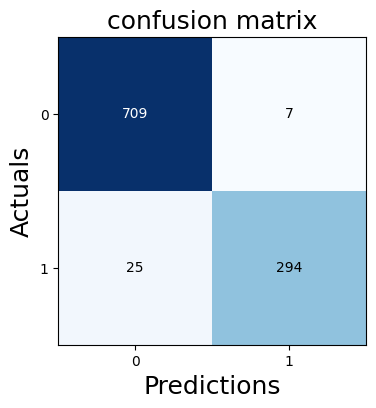

In [156]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('confusion matrix', fontsize = 18)
plt.show()


AUC: 0.955927


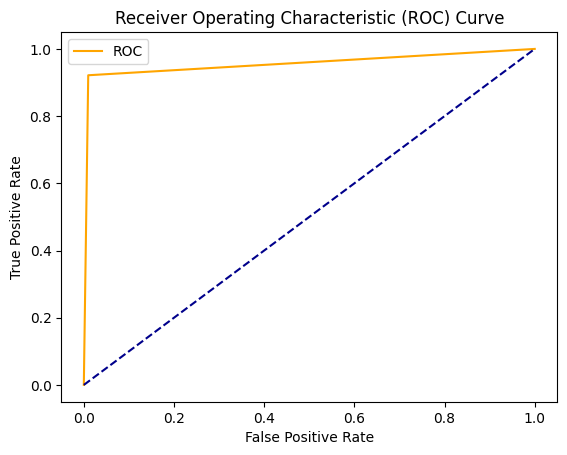

In [157]:

auc_mod2 = roc_auc_score(y_test, y_pred_ann)
print('AUC: %f' %auc_mod2)

fpr, tpr, _ = roc_curve(y_test, y_pred_ann)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()